# Remaining Useful Life (RUL) Prediction

Dataset characteristics:

    a) Data set name: NASA Turbojet (FD002)
    b) Train trjectories: 260
    c) Test trajectories: 259
    d) Conditions: SIX 
    e) Fault Modes: ONE (HPC Degradation)

Data is provided as a text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:

    a) Unit number
    b) Time, in cycles
    c) Operational setting 1
    d) Operational setting 2
    e) Operational setting 3
    f) Sensor measurement  1
    g) Sensor measurement  2
    ...
    h) Sensor measurement  26

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv("Train.txt",sep=" ",header=None)
test = pd.read_csv("Test.txt",sep=" ",header=None)

In [2]:
train.shape

(53759, 28)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN


In [4]:
test.shape

(33991, 28)

In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,NaN,NaN
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,NaN,NaN
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,NaN,NaN
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,NaN,NaN
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,NaN,NaN


In [6]:
df = train.append(test)
df.shape

(87750, 28)

In [7]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')

In [8]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32', "26", "27" ]
df.columns = columns

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_number,87750.0,129.706051,74.360146,1.0000,66.00000,129.00000,192.0000,260.0000
time_in_cycles,87750.0,98.335305,66.788208,1.0000,43.00000,90.00000,143.0000,378.0000
setting_1,87750.0,23.989409,14.759538,0.0000,10.00460,25.00130,41.9980,42.0080
setting_2,87750.0,0.571707,0.310395,0.0000,0.25060,0.70000,0.8400,0.8420
TRA,87750.0,94.054017,14.229790,60.0000,100.00000,100.00000,100.0000,100.0000
T2,87750.0,472.917893,26.414747,445.0000,445.00000,462.54000,491.1900,518.6700
T24,87750.0,579.641141,37.308401,535.4100,549.54000,555.92000,607.3100,644.5200
T30,87750.0,1419.425250,105.960678,1243.7300,1352.31000,1368.45000,1498.9000,1612.8800
T50,87750.0,1204.529599,119.095741,1023.7700,1123.17000,1137.14500,1306.2500,1439.2300
P2,87750.0,8.034708,3.617694,3.9100,3.91000,7.05000,10.5200,14.6200


In [10]:
df.drop(columns = ["setting_2","epr", "BPR", "farB", "26","27"], axis =1, inplace = True)

In [11]:
df.columns

Index(['unit_number', 'time_in_cycles', 'setting_1', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc',
       'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')

In [12]:
df = df[['time_in_cycles', 'unit_number',  'setting_1', 'TRA', 'T2', 'T24', 'T30','T50', 'P2', 'P15', 
         'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc','htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']]

In [13]:
df.columns

Index(['time_in_cycles', 'unit_number', 'setting_1', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc',
       'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

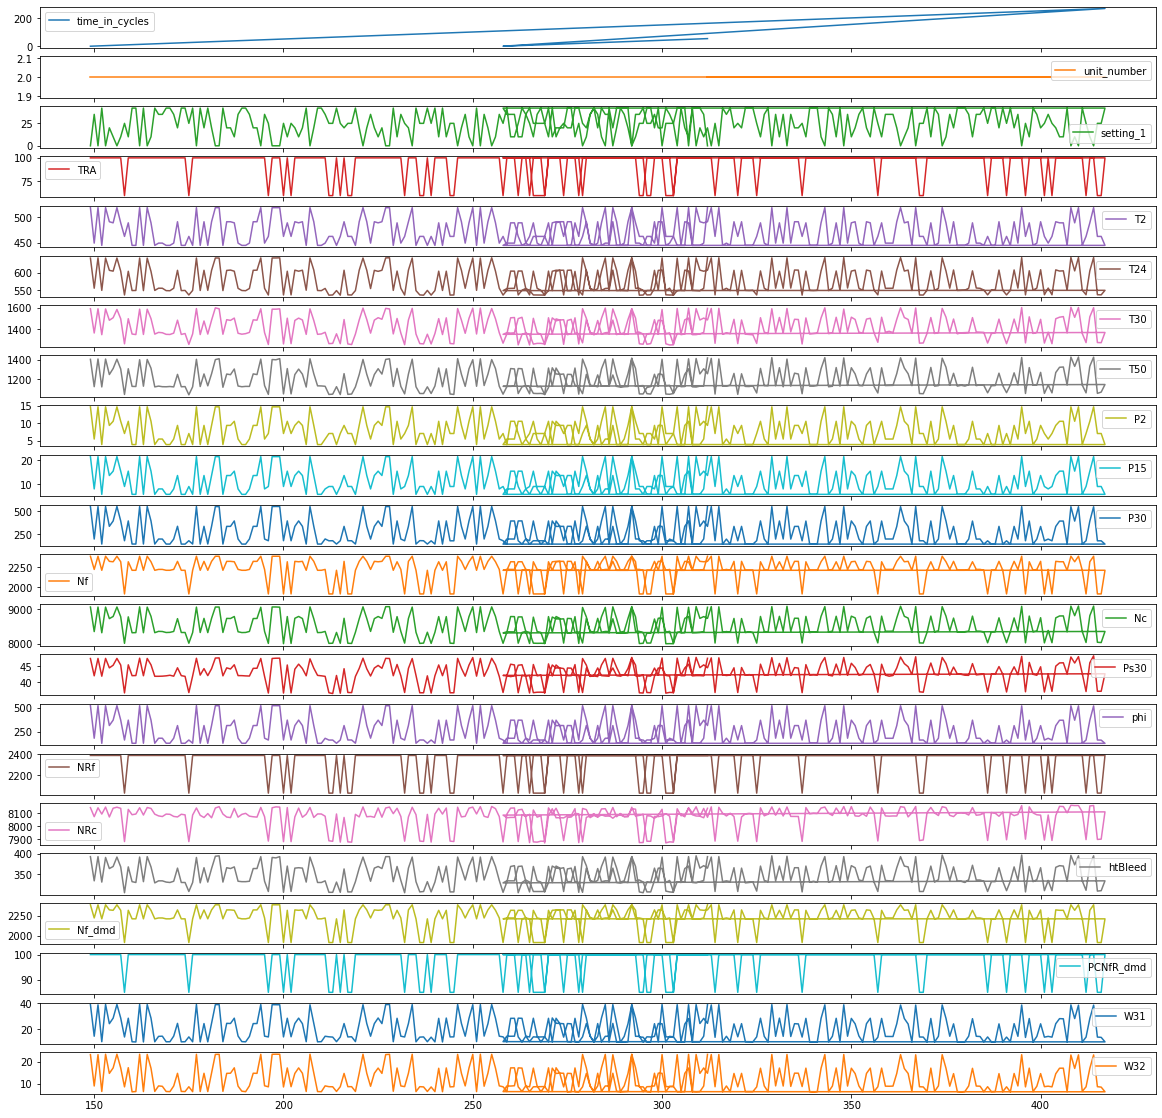

In [14]:
import matplotlib.pyplot as plt

df[df.unit_number == 2].plot(subplots =True, sharex = True, figsize = (20,20))

In [15]:
df.groupby("unit_number")['time_in_cycles'].max().describe()

count    260.000000
mean     214.169231
std       46.552605
min      128.000000
25%      183.000000
50%      204.500000
75%      239.000000
max      378.000000
Name: time_in_cycles, dtype: float64

In [16]:
df.shape

(87750, 22)

In [17]:
df.isnull().sum()

time_in_cycles    0
unit_number       0
setting_1         0
TRA               0
T2                0
T24               0
T30               0
T50               0
P2                0
P15               0
P30               0
Nf                0
Nc                0
Ps30              0
phi               0
NRf               0
NRc               0
htBleed           0
Nf_dmd            0
PCNfR_dmd         0
W31               0
W32               0
dtype: int64

In [18]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [19]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
# print (df.values)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# print(scaled)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
# print(reframed.head())

values = reframed.values
n_train_time = 40000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
print(train_x)
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
print(test_x)

[[[2.65251989e-03 0.00000000e+00 9.99766711e-01 ... 1.00000000e+00
   7.88751715e-03 1.45424799e-02]]

 [[5.30503979e-03 0.00000000e+00 5.95096172e-01 ... 0.00000000e+00
   1.33744856e-01 1.51207708e-01]]

 [[7.95755968e-03 0.00000000e+00 9.99992859e-01 ... 1.00000000e+00
   1.40603567e-02 2.61082960e-02]]

 ...

 [[2.54641910e-01 7.41312741e-01 3.33269853e-05 ... 1.00000000e+00
   9.84567901e-01 9.80776659e-01]]

 [[2.57294430e-01 7.41312741e-01 9.99983337e-01 ... 1.00000000e+00
   1.06310014e-02 2.09388989e-02]]

 [[2.59946950e-01 7.41312741e-01 9.99814321e-01 ... 1.00000000e+00
   9.25925926e-03 1.97630030e-02]]]
[[[2.62599469e-01 7.41312741e-01 5.95162826e-01 ... 0.00000000e+00
   1.44718793e-01 1.45742916e-01]]

 [[2.65251989e-01 7.41312741e-01 2.38016568e-01 ... 1.00000000e+00
   6.21056241e-01 6.32115022e-01]]

 [[2.67904509e-01 7.41312741e-01 6.42734717e-05 ... 1.00000000e+00
   9.83196159e-01 9.80452862e-01]]

 ...

 [[3.18302387e-01 9.96138996e-01 9.99954771e-01 ... 1.0000000

Epoch 1/100
572/572 - 4s - loss: 0.0122 - val_loss: 0.0019
Epoch 2/100
572/572 - 1s - loss: 0.0021 - val_loss: 0.0018
Epoch 3/100
572/572 - 1s - loss: 0.0018 - val_loss: 0.0016
Epoch 4/100
572/572 - 1s - loss: 0.0017 - val_loss: 0.0015
Epoch 5/100
572/572 - 1s - loss: 0.0017 - val_loss: 0.0015
Epoch 6/100
572/572 - 1s - loss: 0.0017 - val_loss: 0.0014
Epoch 7/100
572/572 - 1s - loss: 0.0017 - val_loss: 0.0015
Epoch 8/100
572/572 - 1s - loss: 0.0017 - val_loss: 0.0015
Epoch 9/100
572/572 - 1s - loss: 0.0017 - val_loss: 0.0015
Epoch 10/100
572/572 - 1s - loss: 0.0017 - val_loss: 0.0016
Epoch 11/100
572/572 - 1s - loss: 0.0017 - val_loss: 0.0016
Epoch 12/100
572/572 - 1s - loss: 0.0017 - val_loss: 0.0016
Epoch 13/100
572/572 - 1s - loss: 0.0016 - val_loss: 0.0017
Epoch 14/100
572/572 - 1s - loss: 0.0017 - val_loss: 0.0017
Epoch 15/100
572/572 - 1s - loss: 0.0016 - val_loss: 0.0017
Epoch 16/100
572/572 - 1s - loss: 0.0016 - val_loss: 0.0016
Epoch 17/100
572/572 - 1s - loss: 0.0016 - val_lo

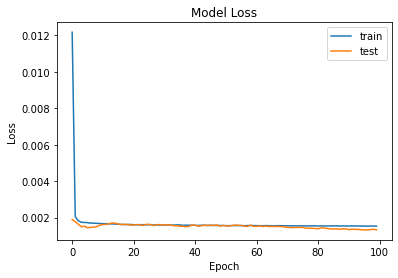

Test RMSE: 13.740


In [20]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_x, train_y, epochs=100, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df.shape[1]

yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

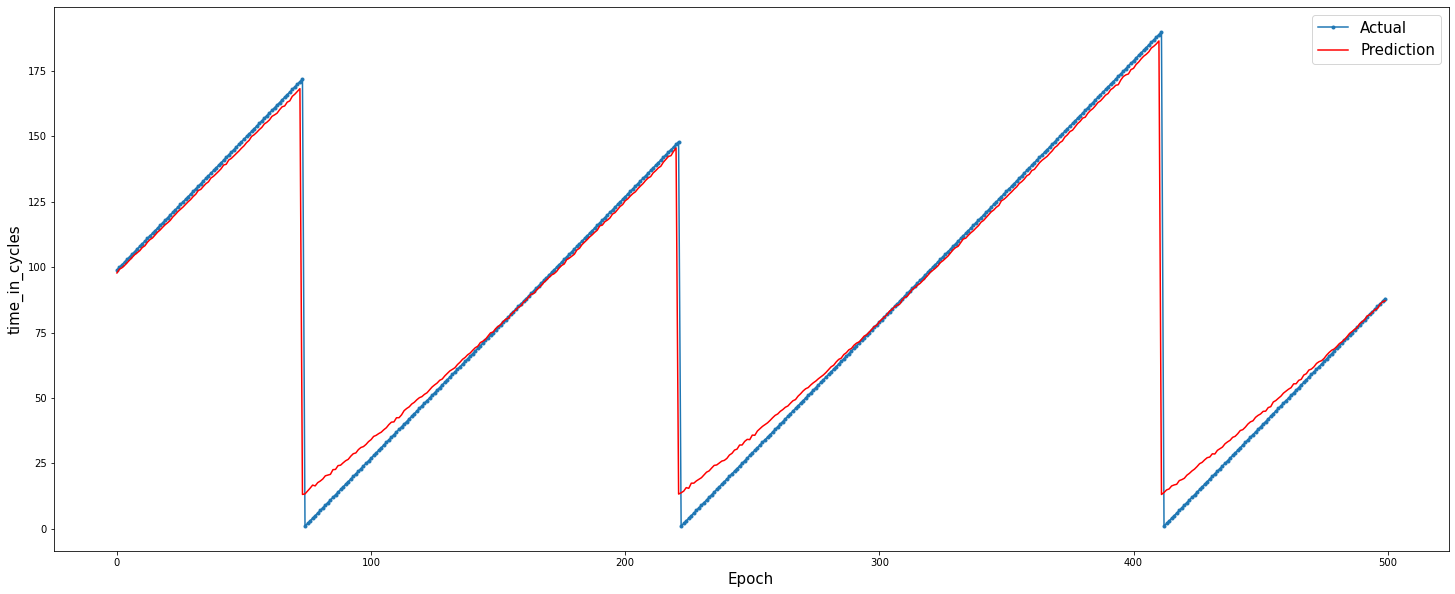

In [21]:
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="Actual")
plt.plot(aa, inv_yhat[:500], 'r', label="Prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Epoch', size=15)
plt.legend(fontsize=15)
plt.show()

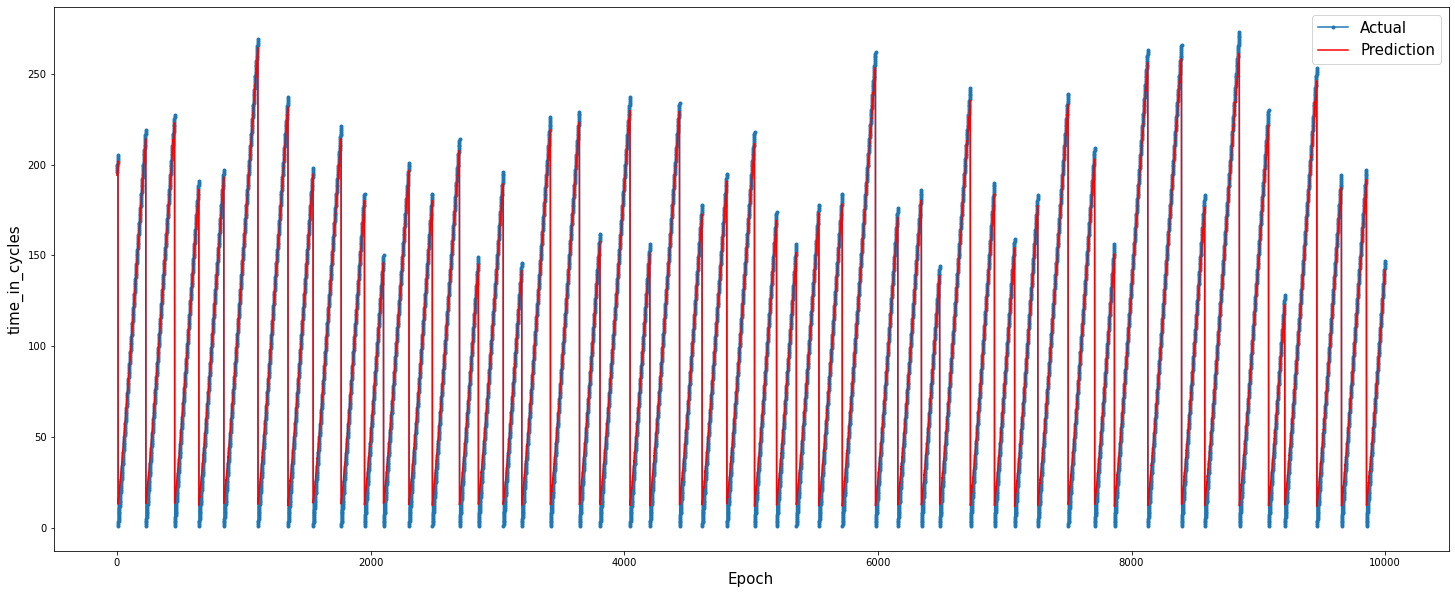

In [22]:
aa=[x for x in range(10000)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[1000:11000], marker='.', label="Actual")
plt.plot(aa, inv_yhat[1000:11000], 'r', label="Prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Epoch', size=15)
plt.legend(fontsize=15)
plt.show()

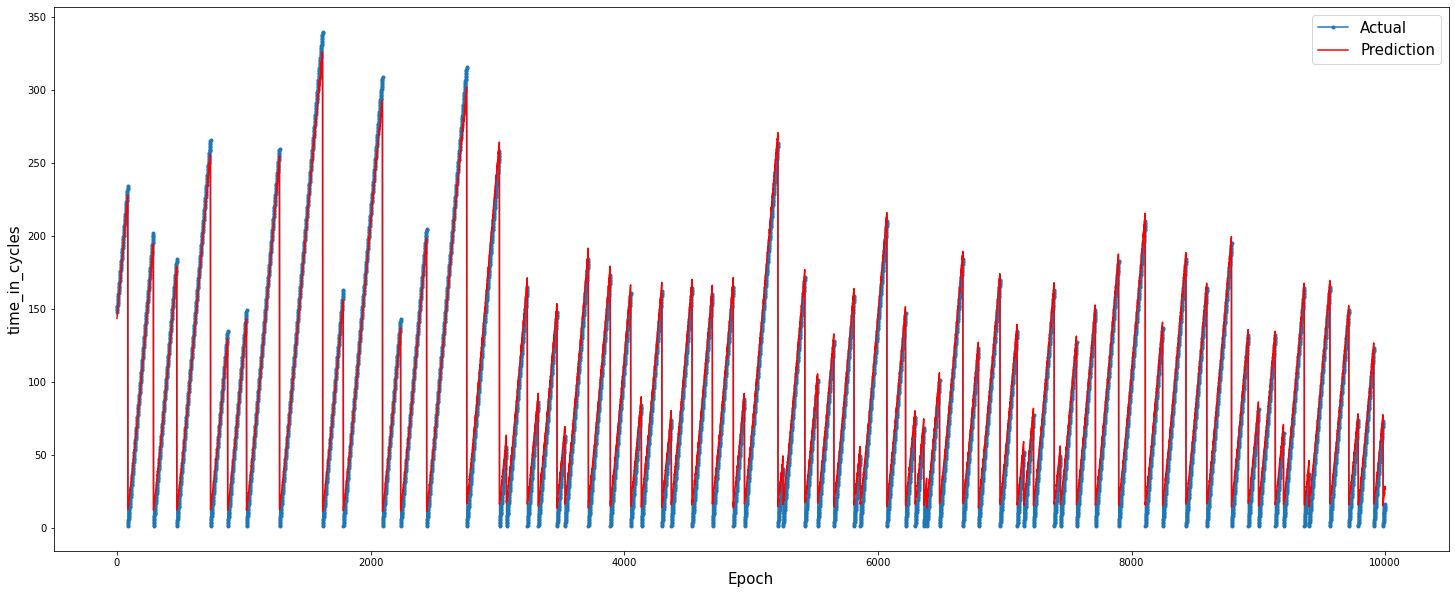

In [23]:
aa=[x for x in range(10000)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[11000:21000], marker='.', label="Actual")
plt.plot(aa, inv_yhat[11000:21000], 'r', label="Prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Epoch', size=15)
plt.legend(fontsize=15)
plt.show()

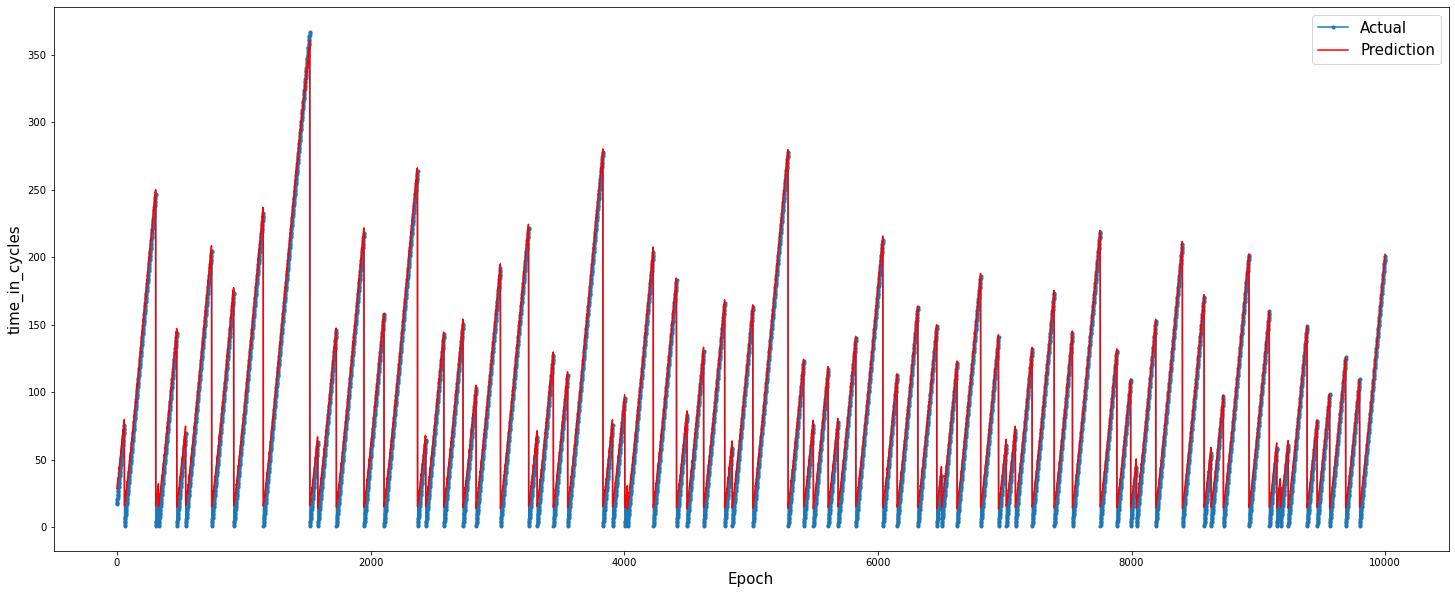

In [24]:
aa=[x for x in range(10000)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[21000:31000], marker='.', label="Actual")
plt.plot(aa, inv_yhat[21000:31000], 'r', label="Prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Epoch', size=15)
plt.legend(fontsize=15)
plt.show()